# Spectroscopic Masses - Stellar Synthetic Population 


# Aim

In this report I generate Stellar Synthetic Population (SSP) as the following cases:

__Test A__   
    (a) generate four SPPs with the ages of 2 Gyr and 10 Gyr ([Fe/H] = 0, -2); extract Teff, logg, [Fe/H] and [Mg/Fe]   
    (b) perturb them by *random* nominal uncertainties of +/-150 K in Teff, +/-0.2 dex in logg, +/-0.1 dex in [Fe/H]   
    (c) redetermine mass and ages — > make comparative histograms with original values  
    
__Test B__   
(a) generate four SPPs with the ages of 2 Gyr and 10 Gyr ([Fe/H] = 0, -2); extract Teff, logg, [Fe/H] and [Mg/Fe]   
(b) perturn them by *systematic* uncertainties of :   
* -150 K in Teff, -0.2 dex in logg, -0.1 dex in [Fe/H];   
*  +150 K in Teff, +0.2 dex in logg, +0.1 dex in [Fe/H];   

(c) redetermine mass and ages — > make comparative histograms   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import sys
sys.path.append('/home/thaise/Libraries/Python/')
import param_functions as pf

img_dir = "graphs/"

In [2]:
pd.set_option('display.max_seq_items', None)
pd.set_option("display.max_columns", None)

In [3]:
# Reading isochrones
isoc_a2_m0 = pd.read_csv('Isoc/isoc_2Gyr_Z0.0152.txt', sep='\s+', skiprows=14, skipinitialspace=True,
                         names=[u'Z', u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
                                u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
                                u'int_IMF', u'stage'])
isoc_a10_m0 = pd.read_csv('Isoc/isoc_10Gyr_Z0.0152.txt', sep='\s+', skiprows=14, skipinitialspace=True,
                         names=[u'Z', u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
                                u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
                                u'int_IMF', u'stage'])       
isoc_a2_m2 = pd.read_csv('Isoc/isoc_2Gyr_Z0.000152.txt', sep='\s+', skiprows=14, skipinitialspace=True,
                         names=[u'Z', u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
                                u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
                                u'int_IMF', u'stage'])
isoc_a10_m2 = pd.read_csv('Isoc/isoc_10Gyr_Z0.000152.txt', sep='\s+', skiprows=14, skipinitialspace=True,
                         names=[u'Z', u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
                                u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
                                u'int_IMF', u'stage'])

### Isochrone 2 Gyr, [M/H]=0.0

In [7]:
isoc_a2_m0.head()

Z  logAge     M_ini   M_act    logL   logTe    logG    mbol       U  \
0  0.0152   9.301  0.090000  0.0900 -3.4224  3.3624  5.2160  13.326  25.881   
1  0.0152   9.301  0.100000  0.1000 -3.2418  3.3880  5.1839  12.875  23.867   
2  0.0152   9.301  0.100233  0.1002 -3.2385  3.3885  5.1834  12.866  23.832   
3  0.0152   9.301  0.120000  0.1200 -2.9777  3.4227  5.1378  12.214  21.108   
4  0.0152   9.301  0.130372  0.1304 -2.8790  3.4336  5.1187  11.968  20.234   

        B       V       R       I       J       H       K   int_IMF  stage  
0  22.192  20.136  17.250  14.547  11.131  10.540  10.238  1.467654      0  
1  20.692  18.745  16.206  13.729  10.743  10.149   9.838  1.570402      0  
2  20.665  18.721  16.188  13.714  10.736  10.142   9.831  1.572679      1  
3  18.617  16.813  14.740  12.569  10.170   9.570   9.252  1.747825      1  
4  17.942  16.184  14.250  12.172   9.950   9.347   9.029  1.827846      1

In [8]:
# Selecting 50 random points in the isochrones from Main Sequence (label=1) till early-AGB (label=7)
sel_a2_m0 = isoc_a2_m0[isoc_a2_m0.stage.isin([1, 2, 3, 4, 5, 6, 7])].sample(n=50, random_state=1)
sel_a2_m0.reset_index(inplace=True)
sel_a2_m0.head()

index       Z  logAge     M_ini   M_act    logL   logTe    logG   mbol  \
0    231  0.0152   9.301  1.730875  1.7309  3.1023  3.5702  0.8070 -2.986   
1     93  0.0152   9.301  1.669933  1.6698  1.3115  3.6945  3.0794  1.491   
2    178  0.0152   9.301  1.707021  1.7070  1.7399  3.6857  2.6251  0.420   
3     78  0.0152   9.301  1.662869  1.6628  1.2224  3.8011  3.5928  1.714   
4    115  0.0152   9.301  1.677152  1.6771  1.7919  3.6671  2.4911  0.290   

       U      B      V      R      I      J      H      K   int_IMF  stage  
0  2.553  0.182 -1.458 -2.439 -3.485 -4.645 -5.488 -5.678  3.251104      7  
1  3.412  2.728  1.789  1.231  0.791  0.156 -0.354 -0.417  3.246007      3  
2  2.496  1.741  0.757  0.182 -0.277 -0.945 -1.479 -1.547  3.249161      4  
3  2.247  2.199  1.718  1.420  1.163  0.843  0.596  0.570  3.245387      2  
4  2.758  1.806  0.738  0.104 -0.394 -1.132 -1.724 -1.801  3.246634      3

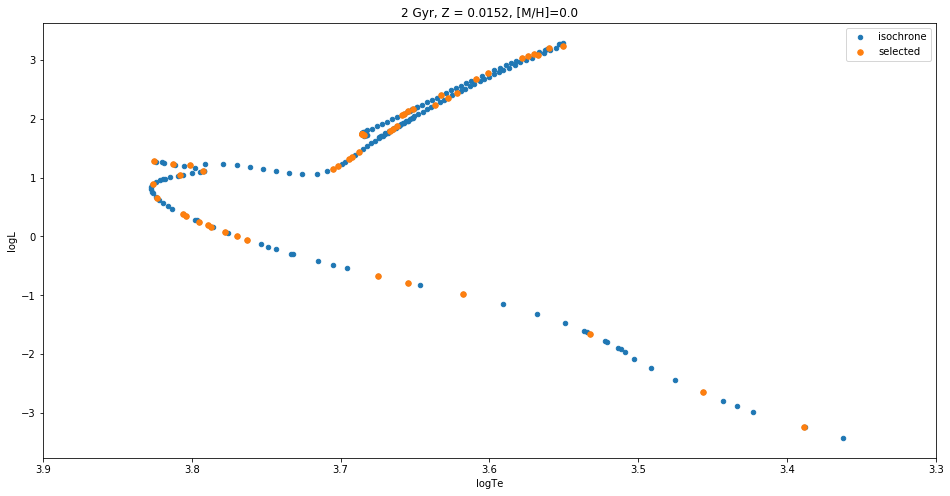

In [9]:
# Isocrhones in blue and selected points in orange
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
isoc_a2_m0.plot.scatter('logTe', 'logL', xlim=[3.9,3.3], ax=ax, label='isochrone')
sel_a2_m0.plot.scatter('logTe', 'logL', xlim=[3.9,3.3], ax=ax, c='C1', s=30, label='selected')
ax.set_title('2 Gyr, Z = 0.0152, [M/H]=0.0')
plt.show()

In [10]:
#Columns in the param input file
cols_to_keep = [ # PARAM input file should follow this sequence:
                'ID', 'DELTA_NU', 'DELTA_NU_ERR', 
                'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR', 'EVOLST', 
                 u'M_H', u'M_H_ERR', u'TEFF', u'TEFF_ERR',
                'LOGG', 'LOGG_ERR', 'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR', 
                'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
                'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
                'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
                'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
                'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
                'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
                'PARALLAX', u'PARALLAX_ERROR']

In [35]:
samp1 = pd.DataFrame(columns=cols_to_keep)
samp1.ID = sel_a2_m0.index
samp1[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp1[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a2_m0[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp1['EVOLST']=0
samp1.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.730875   
1    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.669933   
2    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.707021   
3    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.662869   
4    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.677152   

    M_act    logL   logTe    logG   mbol      U      B      V      R      I  \
0  1.7309  3.1023  3.5702  0.8070 -2.986  2.553  0.182 -1.458 -2.439 -3.485   
1  1.6698  1.3115  3.6945  3.0794  1.491  3.412  2.728  1.789  1.231  0.791   
2  1.7070  1.7399  3.6857  2.6251  0.420  2.496  1.741  0.757  0.182 -0.277   
3  1.6628  1.2224  3.8011  3.5928  1.714  2.247  2.199  1.718  1.420  1.163   
4  1.6771  1.7919  3.6671  2.4911  0.290  2.758  1.806  0.738  0.104 -0.394   

       J      H      K   int_IMF  stage  
0 -4.645 -5.488 -5.678  3.251104      7  
1  0.156 -0.354 -0.417  3.246007      3  
2 -0.945 -1.479 -1.547  3.249161      4  
3  0.843  0.596  0.570  3.245387      2  
4 -1.132 -1.724 -1.801  3.246634      3

In [9]:
# Pertubing TEFF
samp1['DTEFF'] = np.random.RandomState(seed=5).normal(0.0, 150.0, 50)
samp1.TEFF = pow(10.0, sel_a2_m0['logTe']) + samp1.DTEFF
samp1.TEFF_ERR = 150.0
samp1[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR       DTEFF
0  3783.247791     150.0   66.184123
1  4899.170586     150.0  -49.630523
2  5214.149583     150.0  364.615678
3  6287.761044     150.0  -37.813819
4  4662.663938     150.0   16.441476

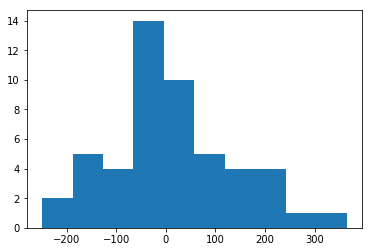

In [10]:
plt.hist(samp1.DTEFF)
plt.show()

In [11]:
# Pertubing logg
samp1['DLOGG'] = np.random.RandomState(seed=7).normal(0.0, 0.2, 50)
samp1.LOGG = sel_a2_m0['logG'] + samp1.DLOGG
samp1.LOGG_ERR = 0.2
samp1[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR     DLOGG
0  1.145105       0.2  0.338105
1  2.986213       0.2 -0.093187
2  2.631664       0.2  0.006564
3  3.674303       0.2  0.081503
4  2.333315       0.2 -0.157785

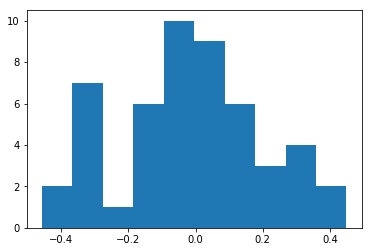

In [12]:
plt.hist(samp1.DLOGG)
plt.show()

In [13]:
# Pertubing [M/H]
samp1['DM_H'] = np.random.RandomState(seed=9).normal(0.0, 0.1, 50)
samp1.M_H = 0.0 + samp1.DM_H
samp1.M_H_ERR = 0.1
samp1[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR      DM_H
0  0.000111      0.1  0.000111
1 -0.028954      0.1 -0.028954
2 -0.111607      0.1 -0.111607
3 -0.001288      0.1 -0.001288
4 -0.037836      0.1 -0.037836

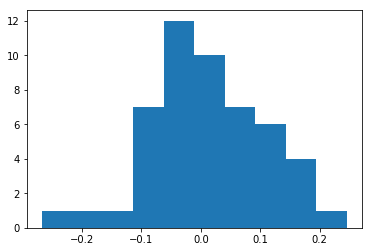

In [14]:
plt.hist(samp1.DM_H)
plt.show()

In [15]:
samp1.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST       M_H  M_H_ERR         TEFF  TEFF_ERR      LOGG  LOGG_ERR  GLON  \
0       0  0.000111      0.1  3783.247791     150.0  1.145105       0.2 -99.9   
1       0 -0.028954      0.1  4899.170586     150.0  2.986213       0.2 -99.9   
2       0 -0.111607      0.1  5214.149583     150.0  2.631664       0.2 -99.9   
3       0 -0.001288      0.1  6287.761044     150.0  3.674303       0.2 -99.9   
4       0 -0.037836      0.1  4662.663938     150.0  2.333315       0.2 -99.9   

   GLAT  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
1 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
2 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
3 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
4 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol      U      B  \
0   9.301  1.730875  1.7309  3.1023  3.5702  0.8070 -2.986  2.553  0.182   
1   9.301  1.669933  1.6698  1.3115  3.6945  3.0794  1.491  3.412  2.728   
2   9.301  1.707021  1.7070  1.7399  3.6857  2.6251  0.420  2.496  1.741   
3   9.301  1.662869  1.6628  1.2224  3.8011  3.5928  1.714  2.247  2.199   
4   9.301  1.677152  1.6771  1.7919  3.6671  2.4911  0.290  2.758  1.806   

       V      R      I      J      H      K   int_IMF  stage       DTEFF  \
0 -1.458 -2.439 -3.485 -4.645 -5.488 -5.678  3.251104      7   66.184123   
1  1.789  1.231  0.791  0.156 -0.354 -0.417  3.246007      3  -49.630523   
2  0.757  0.182 -0.277 -0.945 -1.479 -1.547  3.249161      4  364.615678   
3  1.718  1.420  1.

In [16]:
samp1.to_csv('samp1_2Gyr_m0.0_param.txt', sep=' ', float_format='%.5f', index=False)

### Isochrone 2 Gyr, [M/H]=-2.0

In [25]:
isoc_a2_m2.head()

Z  logAge     M_ini   M_act    logL   logTe    logG    mbol       U  \
0  0.000152   9.301  0.093959  0.0940 -3.0430  3.5144  5.4636  12.377  18.230   
1  0.000152   9.301  0.095858  0.0959 -2.9945  3.5208  5.4494  12.256  17.853   
2  0.000152   9.301  0.097760  0.0978 -2.9447  3.5274  5.4346  12.132  17.474   
3  0.000152   9.301  0.107919  0.1079 -2.6920  3.5610  5.3591  11.500  15.650   
4  0.000152   9.301  0.127919  0.1279 -2.4430  3.5852  5.2808  10.877  14.303   

        B       V       R       I       J       H       K   int_IMF  stage  
0  16.026  14.141  12.802  11.616  10.513  10.233  10.158  1.509566      0  
1  15.776  13.928  12.636  11.504  10.415  10.105  10.017  1.529081      1  
2  15.519  13.717  12.466  11.386  10.313   9.976   9.879  1.548258      1  
3  14.239  12.707  11.631  10.784   9.800   9.350   9.219  1.644779      1  
4  13.206  11.862  10.909  10.172   9.261   8.756   8.606  1.809575      1

In [26]:
# Selecting 50 random points in the isochrones from Main Sequence (label=1) till early-AGB (label=7)
sel_a2_m2 = isoc_a2_m2[isoc_a2_m2.stage.isin([1, 2, 3, 4, 5, 6, 7])].sample(n=50, random_state=2)
sel_a2_m2.reset_index(inplace=True)
sel_a2_m2.head()

index         Z  logAge     M_ini   M_act    logL   logTe    logG   mbol  \
0     26  0.000152   9.301  0.850772  0.8506  0.0035  3.8172  4.5851  4.761   
1     85  0.000152   9.301  1.372105  1.3714  1.4595  3.7548  3.0869  1.121   
2    128  0.000152   9.301  1.390334  1.3795  1.9937  3.7852  2.6766 -0.214   
3     11  0.000152   9.301  0.393894  0.3939 -1.3926  3.6504  4.9795  8.251   
4    179  0.000152   9.301  1.410332  1.3982  2.4722  3.7065  1.8892 -1.411   

        U      B      V      R      I      J      H      K   int_IMF  stage  
0   5.004  5.278  4.907  4.634  4.367  4.054  3.791  3.775  3.092518      1  
1   1.670  1.830  1.305  0.925  0.566  0.106 -0.268 -0.319  3.213320      3  
2   0.214  0.316 -0.098 -0.410 -0.711 -1.096 -1.399 -1.434  3.215783      4  
3  10.244  9.759  8.776  8.111  7.547  6.829  6.319  6.169  2.731804      1  
4  -0.394 -0.432 -1.130 -1.604 -2.043 -2.637 -3.118 -3.192  3.218401      7

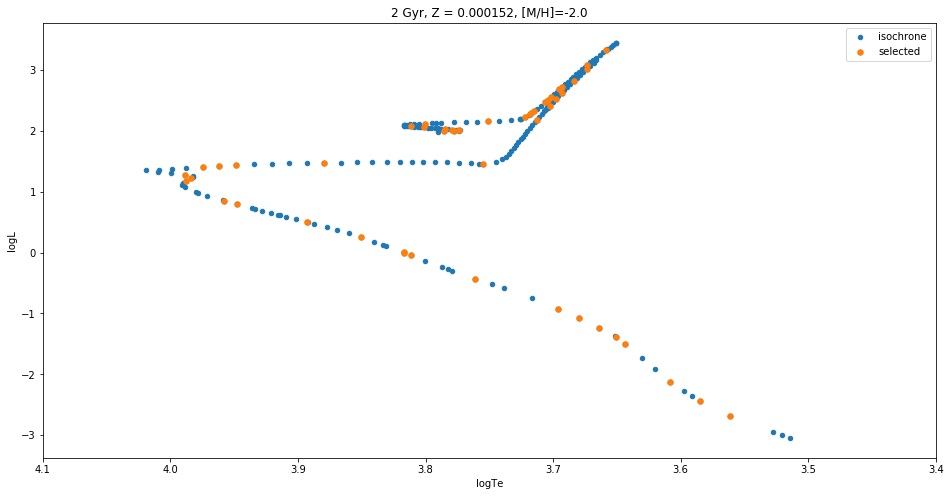

In [27]:
# Isocrhones in blue and selected points in orange
fig2, ax = plt.subplots(1, 1, figsize=(16, 8))
isoc_a2_m2.plot.scatter('logTe', 'logL', xlim=[4.1,3.4], ax=ax, label='isochrone')
sel_a2_m2.plot.scatter('logTe', 'logL', xlim=[4.1,3.4], ax=ax, c='C1', s=30, label='selected')
ax.set_title('2 Gyr, Z = 0.000152, [M/H]=-2.0')
plt.show()

In [21]:
samp2 = pd.DataFrame(columns=cols_to_keep)
samp2.ID = sel_a2_m2.index
samp2[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp2[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a2_m2[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp2['EVOLST']=0
samp2.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  0.850772   
1    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.372105   
2    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.390334   
3    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  0.393894   
4    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.410332   

    M_act    logL   logTe    logG   mbol       U      B      V      R      I  \
0  0.8506  0.0035  3.8172  4.5851  4.761   5.004  5.278  4.907  4.634  4.367   
1  1.3714  1.4595  3.7548  3.0869  1.121   1.670  1.830  1.305  0.925  0.566   
2  1.3795  1.9937  3.7852  2.6766 -0.214   0.214  0.316 -0.098 -0.410 -0.711   
3  0.3939 -1.3926  3.6504  4.9795  8.251  10.244  9.759  8.776  8.111  7.547   
4  1.3982  2.4722  3.7065  1.8892 -1.411  -0.394 -0.432 -1.130 -1.604 -2.043   

       J      H      K   int_IMF  stage  
0  4.054  3.791  3.775  3.092518      1  
1  0.106 -0.268 -0.319  3.213320      3  
2 -1.096 -1.399 -1.434  3.215783      4  
3  6.829  6.319  6.169  2.731804      1  
4 -2.637 -3.118 -3.192  3.218401      7

In [22]:
# Pertubing TEFF
samp2['DTEFF'] = np.random.RandomState(seed=11).normal(0.0, 150.0, 50)
samp2.TEFF = pow(10.0, sel_a2_m2['logTe']) + samp2.DTEFF
samp2.TEFF_ERR = 150.0
samp2[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR       DTEFF
0  6826.893231     150.0  262.418211
1  5642.999297     150.0  -42.910950
2  6025.491870     150.0  -72.684770
3  4072.954141     150.0 -397.997784
4  5086.205502     150.0   -1.242694

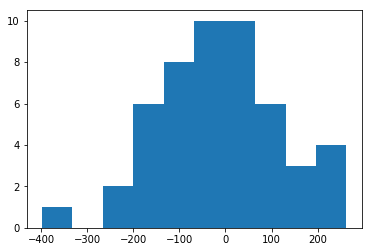

In [23]:
plt.hist(samp2.DTEFF)
plt.show()

In [24]:
# Pertubing logg
samp2['DLOGG'] = np.random.RandomState(seed=13).normal(0.0, 0.2, 50)
samp2.LOGG = sel_a2_m2['logG'] + samp2.DLOGG
samp2.LOGG_ERR = 0.2
samp2[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR     DLOGG
0  4.442622       0.2 -0.142478
1  3.237653       0.2  0.150753
2  2.667699       0.2 -0.008901
3  5.069862       0.2  0.090362
4  2.158220       0.2  0.269020

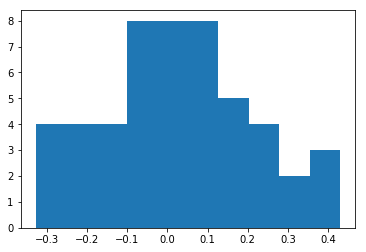

In [25]:
plt.hist(samp2.DLOGG)
plt.show()

In [26]:
# Pertubing [M/H]
samp2['DM_H'] = np.random.RandomState(seed=15).normal(0.0, 0.1, 50)
samp2.M_H = -2.0 + samp2.DM_H
samp2.M_H_ERR = 0.1
samp2[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR      DM_H
0 -2.031233      0.1 -0.031233
1 -1.966072      0.1  0.033928
2 -2.015591      0.1 -0.015591
3 -2.050179      0.1 -0.050179
4 -1.976443      0.1  0.023557

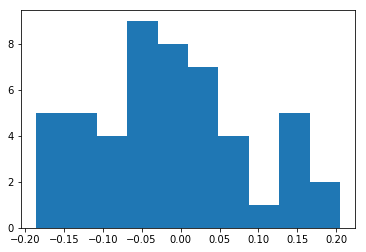

In [27]:
plt.hist(samp2.DM_H)
plt.show()

In [28]:
samp2.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST       M_H  M_H_ERR         TEFF  TEFF_ERR      LOGG  LOGG_ERR  GLON  \
0       0 -2.031233      0.1  6826.893231     150.0  4.442622       0.2 -99.9   
1       0 -1.966072      0.1  5642.999297     150.0  3.237653       0.2 -99.9   
2       0 -2.015591      0.1  6025.491870     150.0  2.667699       0.2 -99.9   
3       0 -2.050179      0.1  4072.954141     150.0  5.069862       0.2 -99.9   
4       0 -1.976443      0.1  5086.205502     150.0  2.158220       0.2 -99.9   

   GLAT  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
1 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
2 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
3 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
4 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol       U      B  \
0   9.301  0.850772  0.8506  0.0035  3.8172  4.5851  4.761   5.004  5.278   
1   9.301  1.372105  1.3714  1.4595  3.7548  3.0869  1.121   1.670  1.830   
2   9.301  1.390334  1.3795  1.9937  3.7852  2.6766 -0.214   0.214  0.316   
3   9.301  0.393894  0.3939 -1.3926  3.6504  4.9795  8.251  10.244  9.759   
4   9.301  1.410332  1.3982  2.4722  3.7065  1.8892 -1.411  -0.394 -0.432   

       V      R      I      J      H      K   int_IMF  stage       DTEFF  \
0  4.907  4.634  4.367  4.054  3.791  3.775  3.092518      1  262.418211   
1  1.305  0.925  0.566  0.106 -0.268 -0.319  3.213320      3  -42.910950   
2 -0.098 -0.410 -0.711 -1.096 -1.399 -1.434  3.215783      4  -72.684770   
3  8.776  8.1

In [29]:
samp2.to_csv('samp2_2Gyr_m-2.0_param.txt', sep=' ', float_format='%.5f', index=False)

### Isochrone 10 Gyr, [M/H]=0.0

In [41]:
isoc_a10_m0.head()

Z  logAge  M_ini  M_act    logL   logTe    logG    mbol       U  \
0  0.0152    10.0   0.09   0.09 -3.4229  3.3625  5.2171  13.327  25.877   
1  0.0152    10.0   0.10   0.10 -3.2404  3.3884  5.1839  12.871  23.844   
2  0.0152    10.0   0.12   0.12 -2.9755  3.4232  5.1376  12.209  21.073   
3  0.0152    10.0   0.14   0.14 -2.7918  3.4435  5.1018  11.749  19.524   
4  0.0152    10.0   0.16   0.16 -2.6501  3.4571  5.0726  11.395  18.510   

        B       V       R       I       J       H       K   int_IMF  stage  
0  22.189  20.133  17.248  14.546  11.132  10.542  10.239  1.467654      1  
1  20.674  18.729  16.195  13.721  10.741  10.146   9.836  1.570402      1  
2  18.592  16.789  14.723  12.556  10.165   9.565   9.247  1.747825      1  
3  17.374  15.660  13.835  11.835   9.754   9.150   8.834  1.895850      1  
4  16.554  14.888  13.212  11.331   9.433   8.827   8.516  2.021152      1

In [42]:
# Selecting 50 random points in the isochrones from Main Sequence (label=1) till early-AGB (label=7)
sel_a10_m0 = isoc_a10_m0[isoc_a2_m0.stage.isin([1, 2, 3, 4, 5, 6, 7])].sample(n=50, random_state=3)
sel_a10_m0.reset_index(inplace=True)
sel_a10_m0.head()

/home/thaise/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


index       Z  logAge     M_ini   M_act    logL   logTe    logG   mbol  \
0     45  0.0152    10.0  1.010935  1.0098  0.3888  3.7388  3.9605  3.798   
1     56  0.0152    10.0  1.025769  1.0244  0.7042  3.6882  3.4489  3.010   
2    144  0.0152    10.0  1.037752  0.9529  1.6636  3.6724  2.3951  0.611   
3    202  0.0152    10.0  1.039497  0.9349  3.2570  3.5129  0.1554 -3.372   
4    175  0.0152    10.0  1.039193  0.9517  2.1437  3.6292  1.7417 -0.589   

       U      B      V      R      I      J      H      K   int_IMF  stage  
0  5.043  4.685  3.927  3.473  3.113  2.628  2.240  2.191  3.143767      2  
1  5.073  4.303  3.346  2.762  2.310  1.655  1.123  1.056  3.147677      3  
2  2.983  2.077  1.023  0.407 -0.080 -0.797 -1.370 -1.445  3.150748      4  
3  3.888  1.925  0.398 -1.239 -3.225 -5.175 -6.085 -6.383  3.151189      7  
4  3.055  1.494  0.156 -0.623 -1.232 -2.121 -2.821 -2.926  3.151112      7

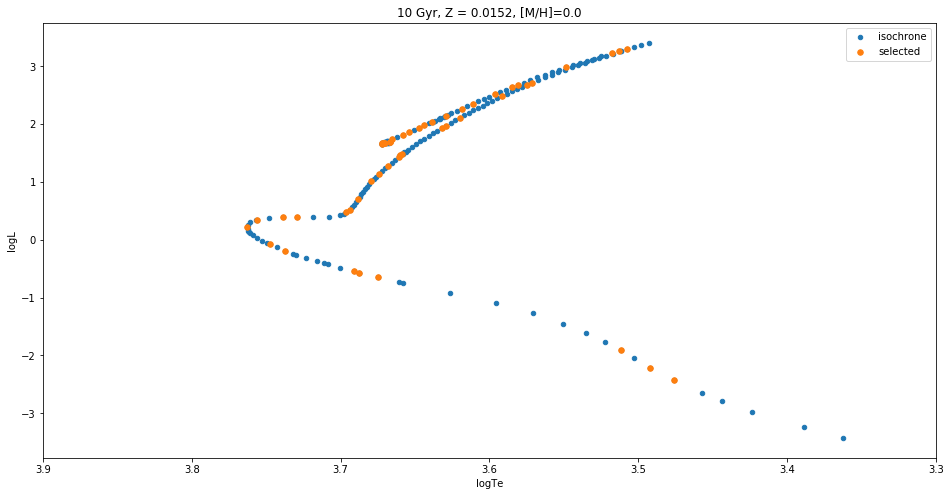

In [43]:
# Isocrhones in blue and selected points in orange
fig2, ax = plt.subplots(1, 1, figsize=(16, 8))
isoc_a10_m0.plot.scatter('logTe', 'logL', xlim=[3.9,3.3], ax=ax, label='isochrone')
sel_a10_m0.plot.scatter('logTe', 'logL', xlim=[3.9,3.3], ax=ax, c='C1', s=30, label='selected')
ax.set_title('10 Gyr, Z = 0.0152, [M/H]=0.0')
plt.show()

In [36]:
samp3 = pd.DataFrame(columns=cols_to_keep)
samp3.ID = sel_a10_m0.index
samp3[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp3[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a10_m0[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp3['EVOLST']=0
samp3.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.010935   
1    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.025769   
2    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.037752   
3    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.039497   
4    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.039193   

    M_act    logL   logTe    logG   mbol      U      B      V      R      I  \
0  1.0098  0.3888  3.7388  3.9605  3.798  5.043  4.685  3.927  3.473  3.113   
1  1.0244  0.7042  3.6882  3.4489  3.010  5.073  4.303  3.346  2.762  2.310   
2  0.9529  1.6636  3.6724  2.3951  0.611  2.983  2.077  1.023  0.407 -0.080   
3  0.9349  3.2570  3.5129  0.1554 -3.372  3.888  1.925  0.398 -1.239 -3.225   
4  0.9517  2.1437  3.6292  1.7417 -0.589  3.055  1.494  0.156 -0.623 -1.232   

       J      H      K   int_IMF  stage  
0  2.628  2.240  2.191  3.143767      2  
1  1.655  1.123  1.056  3.147677      3  
2 -0.797 -1.370 -1.445  3.150748      4  
3 -5.175 -6.085 -6.383  3.151189      7  
4 -2.121 -2.821 -2.926  3.151112      7

In [37]:
# Pertubing TEFF
samp3['DTEFF'] = np.random.RandomState(seed=21).normal(0.0, 150.0, 50)
samp3.TEFF = pow(10.0, sel_a10_m0['logTe']) + samp3.DTEFF
samp3.TEFF_ERR = 150.0
samp3[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR       DTEFF
0  5472.450684     150.0   -7.794637
1  4860.851162     150.0  -16.679408
2  4859.540484     150.0  156.269520
3  3069.105936     150.0 -188.510894
4  4369.752688     150.0  111.808152

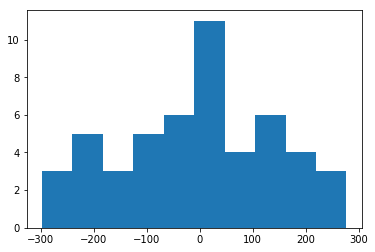

In [38]:
plt.hist(samp3.DTEFF)
plt.show()

In [39]:
# Pertubing logg
samp3['DLOGG'] = np.random.RandomState(seed=23).normal(0.0, 0.2, 50)
samp3.LOGG = sel_a10_m0['logG'] + samp3.DLOGG
samp3.LOGG_ERR = 0.2
samp3[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR     DLOGG
0  4.093898       0.2  0.133398
1  3.454063       0.2  0.005163
2  2.239576       0.2 -0.155524
3  0.345127       0.2  0.189727
4  1.882034       0.2  0.140334

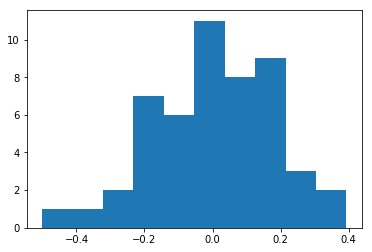

In [40]:
plt.hist(samp3.DLOGG)
plt.show()

In [41]:
# Pertubing [M/H]
samp3['DM_H'] = np.random.RandomState(seed=25).normal(0.0, 0.1, 50)
samp3.M_H = 0.0 + samp3.DM_H
samp3.M_H_ERR = 0.1
samp3[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR      DM_H
0  0.022827      0.1  0.022827
1  0.102689      0.1  0.102689
2 -0.083958      0.1 -0.083958
3 -0.059118      0.1 -0.059118
4 -0.095689      0.1 -0.095689

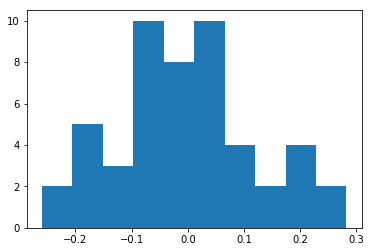

In [42]:
plt.hist(samp3.DM_H)
plt.show()

In [43]:
samp3.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST       M_H  M_H_ERR         TEFF  TEFF_ERR      LOGG  LOGG_ERR  GLON  \
0       0  0.022827      0.1  5472.450684     150.0  4.093898       0.2 -99.9   
1       0  0.102689      0.1  4860.851162     150.0  3.454063       0.2 -99.9   
2       0 -0.083958      0.1  4859.540484     150.0  2.239576       0.2 -99.9   
3       0 -0.059118      0.1  3069.105936     150.0  0.345127       0.2 -99.9   
4       0 -0.095689      0.1  4369.752688     150.0  1.882034       0.2 -99.9   

   GLAT  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
1 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
2 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
3 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
4 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol      U      B  \
0    10.0  1.010935  1.0098  0.3888  3.7388  3.9605  3.798  5.043  4.685   
1    10.0  1.025769  1.0244  0.7042  3.6882  3.4489  3.010  5.073  4.303   
2    10.0  1.037752  0.9529  1.6636  3.6724  2.3951  0.611  2.983  2.077   
3    10.0  1.039497  0.9349  3.2570  3.5129  0.1554 -3.372  3.888  1.925   
4    10.0  1.039193  0.9517  2.1437  3.6292  1.7417 -0.589  3.055  1.494   

       V      R      I      J      H      K   int_IMF  stage       DTEFF  \
0  3.927  3.473  3.113  2.628  2.240  2.191  3.143767      2   -7.794637   
1  3.346  2.762  2.310  1.655  1.123  1.056  3.147677      3  -16.679408   
2  1.023  0.407 -0.080 -0.797 -1.370 -1.445  3.150748      4  156.269520   
3  0.398 -1.239 -3.

In [44]:
samp3.to_csv('samp3_10Gyr_m0.0_param.txt', sep=' ', float_format='%.5f', index=False)

### Isochrone 10 Gyr, [M/H]=-2.0

In [56]:
isoc_a10_m2.head()

Z  logAge     M_ini   M_act    logL   logTe    logG    mbol       U  \
0  0.000152    10.0  0.093959  0.0940 -3.0372  3.5155  5.4620  12.363  18.174   
1  0.000152    10.0  0.094245  0.0942 -3.0295  3.5165  5.4597  12.344  18.114   
2  0.000152    10.0  0.107919  0.1079 -2.6849  3.5621  5.3564  11.482  15.597   
3  0.000152    10.0  0.127919  0.1279 -2.4342  3.5863  5.2761  10.855  14.252   
4  0.000152    10.0  0.147919  0.1479 -2.2674  3.5986  5.2217  10.438  13.514   

        B       V       R       I       J       H       K   int_IMF  stage  
0  15.990  14.111  12.780  11.603  10.503  10.218  10.140  1.509566      1  
1  15.951  14.077  12.754  11.585  10.487  10.197  10.117  1.512521      1  
2  14.201  12.678  11.608  10.767   9.787   9.334   9.201  1.644779      1  
3  13.168  11.832  10.884  10.151   9.242   8.736   8.585  1.809575      1  
4  12.568  11.315  10.430   9.736   8.865   8.342   8.181  1.947817      1

In [57]:
# Selecting 50 random points in the isochrones from Main Sequence (label=1) till early-AGB (label=7)
sel_a10_m2 = isoc_a10_m2[isoc_a10_m2.stage.isin([1, 2, 3, 4, 5, 6, 7])].sample(n=50, random_state=4)
sel_a10_m2.reset_index(inplace=True)
sel_a10_m2.head()

index         Z  logAge     M_ini   M_act    logL   logTe    logG   mbol  \
0    175  0.000152    10.0  0.845721  0.7802  2.9305  3.6665  1.0176 -2.556   
1    154  0.000152    10.0  0.845481  0.7878  2.1725  3.7118  1.9609 -0.661   
2     48  0.000152    10.0  0.834069  0.8325  0.7943  3.7717  3.6028  2.784   
3     80  0.000152    10.0  0.842874  0.8347  2.2008  3.6978  1.9019 -0.732   
4     34  0.000152    10.0  0.799515  0.7986  0.3474  3.8243  4.2422  3.901   

       U      B      V      R      I      J      H      K   int_IMF  stage  
0 -0.807 -1.167 -2.114 -2.694 -3.219 -3.943 -4.528 -4.622  3.090577      7  
1  0.287  0.276 -0.396 -0.857 -1.287 -1.866 -2.334 -2.406  3.090485      7  
2  3.231  3.435  2.948  2.595  2.260  1.846  1.510  1.466  3.086009      2  
3  0.386  0.318 -0.423 -0.916 -1.373 -1.992 -2.492 -2.573  3.089473      3  
4  4.150  4.373  4.029  3.773  3.522  3.226  2.982  2.967  3.071661      1

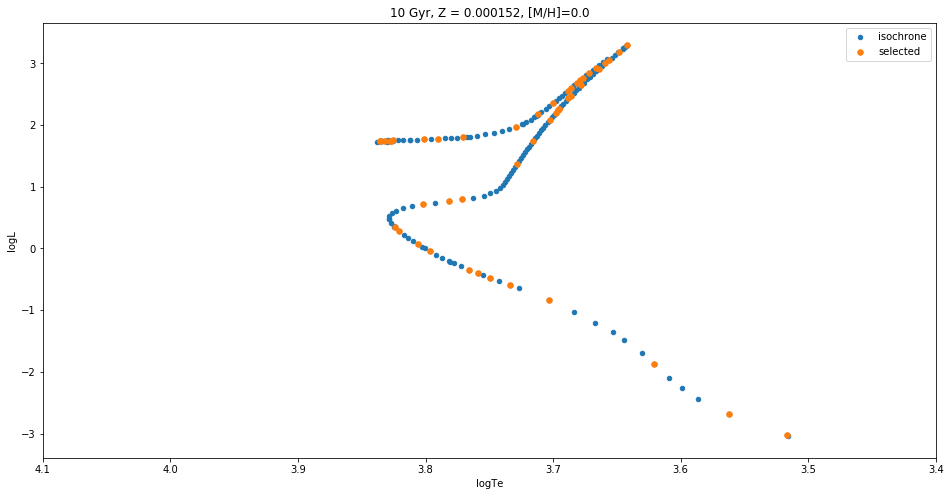

In [58]:
# Isocrhones in blue and selected points in orange
fig2, ax = plt.subplots(1, 1, figsize=(16, 8))
isoc_a10_m2.plot.scatter('logTe', 'logL', xlim=[4.1,3.4], ax=ax, label='isochrone')
sel_a10_m2.plot.scatter('logTe', 'logL', xlim=[4.1,3.4], ax=ax, c='C1', s=30, label='selected')
ax.set_title('10 Gyr, Z = 0.000152, [M/H]=0.0')
plt.show()

In [63]:
samp4 = pd.DataFrame(columns=cols_to_keep)
samp4.ID = sel_a10_m2.index
samp4[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp4[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a10_m2[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp4['EVOLST']=0
samp4.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.845721   
1    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.845481   
2    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.834069   
3    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.842874   
4    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.799515   

    M_act    logL   logTe    logG   mbol      U      B      V      R      I  \
0  0.7802  2.9305  3.6665  1.0176 -2.556 -0.807 -1.167 -2.114 -2.694 -3.219   
1  0.7878  2.1725  3.7118  1.9609 -0.661  0.287  0.276 -0.396 -0.857 -1.287   
2  0.8325  0.7943  3.7717  3.6028  2.784  3.231  3.435  2.948  2.595  2.260   
3  0.8347  2.2008  3.6978  1.9019 -0.732  0.386  0.318 -0.423 -0.916 -1.373   
4  0.7986  0.3474  3.8243  4.2422  3.901  4.150  4.373  4.029  3.773  3.522   

       J      H      K   int_IMF  stage  
0 -3.943 -4.528 -4.622  3.090577      7  
1 -1.866 -2.334 -2.406  3.090485      7  
2  1.846  1.510  1.466  3.086009      2  
3 -1.992 -2.492 -2.573  3.089473      3  
4  3.226  2.982  2.967  3.071661      1

In [64]:
# Pertubing TEFF
samp4['DTEFF'] = np.random.RandomState(seed=32).normal(0.0, 150.0, 50)
samp4.TEFF = pow(10.0, sel_a10_m2['logTe']) + samp4.DTEFF
samp4.TEFF_ERR = 150.0
samp4[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR       DTEFF
0  4587.473732     150.0  -52.334168
1  5297.469791     150.0  147.555515
2  5998.669814     150.0   87.138425
3  4997.090622     150.0   10.542666
4  6789.305323     150.0  116.629901

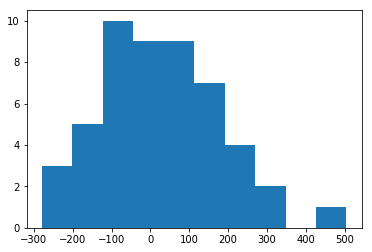

In [65]:
plt.hist(samp4.DTEFF)
plt.show()

In [66]:
# Pertubing logg
samp4['DLOGG'] = np.random.RandomState(seed=34).normal(0.0, 0.2, 50)
samp4.LOGG = sel_a10_m2['logG'] + samp4.DLOGG
samp4.LOGG_ERR = 0.2
samp4[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR     DLOGG
0  1.066367       0.2  0.048767
1  1.811436       0.2 -0.149464
2  3.290565       0.2 -0.312235
3  1.809049       0.2 -0.092851
4  4.171788       0.2 -0.070412

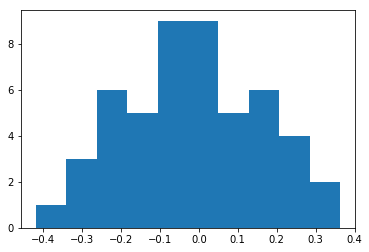

In [68]:
plt.hist(samp4.DLOGG)
plt.show()

In [69]:
# Pertubing [M/H]
samp4['DM_H'] = np.random.RandomState(seed=36).normal(0.0, 0.1, 50)
samp4.M_H = -2.0 + samp4.DM_H
samp4.M_H_ERR = 0.1
samp4[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR      DM_H
0 -1.932359      0.1  0.067641
1 -1.847890      0.1  0.152110
2 -2.051188      0.1 -0.051188
3 -1.884981      0.1  0.115019
4 -2.059072      0.1 -0.059072

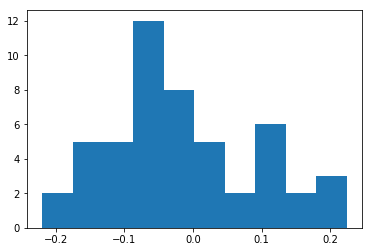

In [70]:
plt.hist(samp4.DM_H)
plt.show()

In [71]:
samp4.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST       M_H  M_H_ERR         TEFF  TEFF_ERR      LOGG  LOGG_ERR  GLON  \
0       0 -1.932359      0.1  4587.473732     150.0  1.066367       0.2 -99.9   
1       0 -1.847890      0.1  5297.469791     150.0  1.811436       0.2 -99.9   
2       0 -2.051188      0.1  5998.669814     150.0  3.290565       0.2 -99.9   
3       0 -1.884981      0.1  4997.090622     150.0  1.809049       0.2 -99.9   
4       0 -2.059072      0.1  6789.305323     150.0  4.171788       0.2 -99.9   

   GLAT  KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
1 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
2 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
3 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   
4 -99.9    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol      U      B  \
0    10.0  0.845721  0.7802  2.9305  3.6665  1.0176 -2.556 -0.807 -1.167   
1    10.0  0.845481  0.7878  2.1725  3.7118  1.9609 -0.661  0.287  0.276   
2    10.0  0.834069  0.8325  0.7943  3.7717  3.6028  2.784  3.231  3.435   
3    10.0  0.842874  0.8347  2.2008  3.6978  1.9019 -0.732  0.386  0.318   
4    10.0  0.799515  0.7986  0.3474  3.8243  4.2422  3.901  4.150  4.373   

       V      R      I      J      H      K   int_IMF  stage       DTEFF  \
0 -2.114 -2.694 -3.219 -3.943 -4.528 -4.622  3.090577      7  -52.334168   
1 -0.396 -0.857 -1.287 -1.866 -2.334 -2.406  3.090485      7  147.555515   
2  2.948  2.595  2.260  1.846  1.510  1.466  3.086009      2   87.138425   
3 -0.423 -0.916 -1.

In [72]:
samp4.to_csv('samp4_10Gyr_m-2.0_param.txt', sep=' ', float_format='%.5f', index=False)

samp1_par.df[samp1_par.df < -90.0] = pd.np.nan
samp1_par.df.plot.scatter('mass_mo', 'M_act')

samp1_par.df = samp1_par.df.where(samp1_par.df.notnull(), -99.9)
samp1_par.df.to_csv("samp1_par.txt", sep=" ", index=False)

samp1_par.plot('mass_mo')

## Systematic uncertainties

Sample 1

In [24]:
samp1_sys = pd.DataFrame(columns=cols_to_keep)
samp1_sys.ID = sel_a2_m0.index
samp1_sys[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp1_sys[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a2_m0[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp1_sys['EVOLST']=0
samp1_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.730875   
1    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.669933   
2    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.707021   
3    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.662869   
4    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.677152   

    M_act    logL   logTe    logG   mbol      U      B      V      R      I  \
0  1.7309  3.1023  3.5702  0.8070 -2.986  2.553  0.182 -1.458 -2.439 -3.485   
1  1.6698  1.3115  3.6945  3.0794  1.491  3.412  2.728  1.789  1.231  0.791   
2  1.7070  1.7399  3.6857  2.6251  0.420  2.496  1.741  0.757  0.182 -0.277   
3  1.6628  1.2224  3.8011  3.5928  1.714  2.247  2.199  1.718  1.420  1.163   
4  1.6771  1.7919  3.6671  2.4911  0.290  2.758  1.806  0.738  0.104 -0.394   

       J      H      K   int_IMF  stage  
0 -4.645 -5.488 -5.678  3.251104      7  
1  0.156 -0.354 -0.417  3.246007      3  
2 -0.945 -1.479 -1.547  3.249161      4  
3  0.843  0.596  0.570  3.245387      2  
4 -1.132 -1.724 -1.801  3.246634      3

In [18]:
# Pertubing TEFF
samp1_sys['DTEFF'] = +150.0
samp1_sys.TEFF = pow(10.0, sel_a2_m0['logTe']) + samp1_sys.DTEFF
samp1_sys.TEFF_ERR = 150.0
samp1_sys[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR  DTEFF
0  3867.063668     150.0  150.0
1  5098.801109     150.0  150.0
2  4999.533905     150.0  150.0
3  6475.574864     150.0  150.0
4  4796.222461     150.0  150.0

In [19]:
# Pertubing logg
samp1_sys['DLOGG'] = +0.2
samp1_sys.LOGG = sel_a2_m0['logG'] + samp1_sys.DLOGG
samp1_sys.LOGG_ERR = 0.2
samp1_sys[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR  DLOGG
0  1.0070       0.2    0.2
1  3.2794       0.2    0.2
2  2.8251       0.2    0.2
3  3.7928       0.2    0.2
4  2.6911       0.2    0.2

In [20]:
# Pertubing [M/H]
samp1_sys['DM_H'] = +0.1
samp1_sys.M_H = 0.0 + samp1_sys.DM_H
samp1_sys.M_H_ERR = 0.1
samp1_sys[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR  DM_H
0  0.1      0.1   0.1
1  0.1      0.1   0.1
2  0.1      0.1   0.1
3  0.1      0.1   0.1
4  0.1      0.1   0.1

In [21]:
samp1_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H  M_H_ERR         TEFF  TEFF_ERR    LOGG  LOGG_ERR  GLON  GLAT  \
0       0  0.1      0.1  3867.063668     150.0  1.0070       0.2 -99.9 -99.9   
1       0  0.1      0.1  5098.801109     150.0  3.2794       0.2 -99.9 -99.9   
2       0  0.1      0.1  4999.533905     150.0  2.8251       0.2 -99.9 -99.9   
3       0  0.1      0.1  6475.574864     150.0  3.7928       0.2 -99.9 -99.9   
4       0  0.1      0.1  4796.222461     150.0  2.6911       0.2 -99.9 -99.9   

   KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0    -99.9        -99.9       -99.9           -99.9       -99.9   
1    -99.9        -99.9       -99.9           -99.9       -99.9   
2    -99.9        -99.9       -99.9           -99.9       -99.9   
3    -99.9        -99.9       -99.9           -99.9       -99.9   
4    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol      U      B  \
0   9.301  1.730875  1.7309  3.1023  3.5702  0.8070 -2.986  2.553  0.182   
1   9.301  1.669933  1.6698  1.3115  3.6945  3.0794  1.491  3.412  2.728   
2   9.301  1.707021  1.7070  1.7399  3.6857  2.6251  0.420  2.496  1.741   
3   9.301  1.662869  1.6628  1.2224  3.8011  3.5928  1.714  2.247  2.199   
4   9.301  1.677152  1.6771  1.7919  3.6671  2.4911  0.290  2.758  1.806   

       V      R      I      J      H      K   int_IMF  stage  DTEFF  DLOGG  \
0 -1.458 -2.439 -3.485 -4.645 -5.488 -5.678  3.251104      7  150.0    0.2   
1  1.789  1.231  0.791  0.156 -0.354 -0.417  3.246007      3  150.0    0.2   
2  0.757  0.182 -0.277 -0.945 -1.479 -1.547  3.249161      4  150.0    0.2   
3  1.718  1.420  1.163  0.843  0.596  0.570  3.245387

In [22]:
samp1_sys.to_csv('samp1_2Gyr_m0.0_sysp_param.txt', sep=' ', float_format='%.5f', index=False)

### Sample 2

In [35]:
samp2_sys = pd.DataFrame(columns=cols_to_keep)
samp2_sys.ID = sel_a2_m2.index
samp2_sys[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp2_sys[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a2_m2[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp2_sys['EVOLST']=0
samp2_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  0.850772   
1    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.372105   
2    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.390334   
3    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  0.393894   
4    -99.9    -99.9    -99.9     -99.9           -99.9   9.301  1.410332   

    M_act    logL   logTe    logG   mbol       U      B      V      R      I  \
0  0.8506  0.0035  3.8172  4.5851  4.761   5.004  5.278  4.907  4.634  4.367   
1  1.3714  1.4595  3.7548  3.0869  1.121   1.670  1.830  1.305  0.925  0.566   
2  1.3795  1.9937  3.7852  2.6766 -0.214   0.214  0.316 -0.098 -0.410 -0.711   
3  0.3939 -1.3926  3.6504  4.9795  8.251  10.244  9.759  8.776  8.111  7.547   
4  1.3982  2.4722  3.7065  1.8892 -1.411  -0.394 -0.432 -1.130 -1.604 -2.043   

       J      H      K   int_IMF  stage  
0  4.054  3.791  3.775  3.092518      1  
1  0.106 -0.268 -0.319  3.213320      3  
2 -1.096 -1.399 -1.434  3.215783      4  
3  6.829  6.319  6.169  2.731804      1  
4 -2.637 -3.118 -3.192  3.218401      7

In [36]:
# Pertubing TEFF
samp2_sys['DTEFF'] = +150.0
samp2_sys.TEFF = pow(10.0, sel_a2_m2['logTe']) + samp2_sys.DTEFF
samp2_sys.TEFF_ERR = 150.0
samp2_sys[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR  DTEFF
0  6714.475020     150.0  150.0
1  5835.910247     150.0  150.0
2  6248.176640     150.0  150.0
3  4620.951925     150.0  150.0
4  5237.448196     150.0  150.0

In [37]:
# Pertubing logg
samp2_sys['DLOGG'] = +0.2
samp2_sys.LOGG = sel_a2_m2['logG'] + samp2_sys.DLOGG
samp2_sys.LOGG_ERR = 0.2
samp2_sys[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR  DLOGG
0  4.7851       0.2    0.2
1  3.2869       0.2    0.2
2  2.8766       0.2    0.2
3  5.1795       0.2    0.2
4  2.0892       0.2    0.2

In [38]:
# Pertubing [M/H]
samp2_sys['DM_H'] = +0.1
samp2_sys.M_H = -2.0 + samp2_sys.DM_H
samp2_sys.M_H_ERR = 0.1
samp2_sys[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR  DM_H
0 -1.9      0.1   0.1
1 -1.9      0.1   0.1
2 -1.9      0.1   0.1
3 -1.9      0.1   0.1
4 -1.9      0.1   0.1

In [39]:
samp2_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H  M_H_ERR         TEFF  TEFF_ERR    LOGG  LOGG_ERR  GLON  GLAT  \
0       0 -1.9      0.1  6714.475020     150.0  4.7851       0.2 -99.9 -99.9   
1       0 -1.9      0.1  5835.910247     150.0  3.2869       0.2 -99.9 -99.9   
2       0 -1.9      0.1  6248.176640     150.0  2.8766       0.2 -99.9 -99.9   
3       0 -1.9      0.1  4620.951925     150.0  5.1795       0.2 -99.9 -99.9   
4       0 -1.9      0.1  5237.448196     150.0  2.0892       0.2 -99.9 -99.9   

   KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0    -99.9        -99.9       -99.9           -99.9       -99.9   
1    -99.9        -99.9       -99.9           -99.9       -99.9   
2    -99.9        -99.9       -99.9           -99.9       -99.9   
3    -99.9        -99.9       -99.9           -99.9       -99.9   
4    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol       U      B  \
0   9.301  0.850772  0.8506  0.0035  3.8172  4.5851  4.761   5.004  5.278   
1   9.301  1.372105  1.3714  1.4595  3.7548  3.0869  1.121   1.670  1.830   
2   9.301  1.390334  1.3795  1.9937  3.7852  2.6766 -0.214   0.214  0.316   
3   9.301  0.393894  0.3939 -1.3926  3.6504  4.9795  8.251  10.244  9.759   
4   9.301  1.410332  1.3982  2.4722  3.7065  1.8892 -1.411  -0.394 -0.432   

       V      R      I      J      H      K   int_IMF  stage  DTEFF  DLOGG  \
0  4.907  4.634  4.367  4.054  3.791  3.775  3.092518      1  150.0    0.2   
1  1.305  0.925  0.566  0.106 -0.268 -0.319  3.213320      3  150.0    0.2   
2 -0.098 -0.410 -0.711 -1.096 -1.399 -1.434  3.215783      4  150.0    0.2   
3  8.776  8.111  7.547  6.829  6.319  6.169  2.

In [40]:
samp2_sys.to_csv('samp2_2Gyr_m-2.0_sysp_param.txt', sep=' ', float_format='%.5f', index=False)

### Sample 3

In [50]:
samp3_sys = pd.DataFrame(columns=cols_to_keep)
samp3_sys.ID = sel_a10_m0.index
samp3_sys[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp3_sys[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a10_m0[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp3_sys['EVOLST']=0
samp3_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.010935   
1    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.025769   
2    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.037752   
3    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.039497   
4    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  1.039193   

    M_act    logL   logTe    logG   mbol      U      B      V      R      I  \
0  1.0098  0.3888  3.7388  3.9605  3.798  5.043  4.685  3.927  3.473  3.113   
1  1.0244  0.7042  3.6882  3.4489  3.010  5.073  4.303  3.346  2.762  2.310   
2  0.9529  1.6636  3.6724  2.3951  0.611  2.983  2.077  1.023  0.407 -0.080   
3  0.9349  3.2570  3.5129  0.1554 -3.372  3.888  1.925  0.398 -1.239 -3.225   
4  0.9517  2.1437  3.6292  1.7417 -0.589  3.055  1.494  0.156 -0.623 -1.232   

       J      H      K   int_IMF  stage  
0  2.628  2.240  2.191  3.143767      2  
1  1.655  1.123  1.056  3.147677      3  
2 -0.797 -1.370 -1.445  3.150748      4  
3 -5.175 -6.085 -6.383  3.151189      7  
4 -2.121 -2.821 -2.926  3.151112      7

In [51]:
# Pertubing TEFF
samp3_sys['DTEFF'] = +150.0
samp3_sys.TEFF = pow(10.0, sel_a10_m0['logTe']) + samp3_sys.DTEFF
samp3_sys.TEFF_ERR = 150.0
samp3_sys[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR  DTEFF
0  5630.245322     150.0  150.0
1  5027.530570     150.0  150.0
2  4853.270964     150.0  150.0
3  3407.616830     150.0  150.0
4  4407.944536     150.0  150.0

In [52]:
# Pertubing logg
samp3_sys['DLOGG'] = +0.2
samp3_sys.LOGG = sel_a10_m0['logG'] + samp3_sys.DLOGG
samp3_sys.LOGG_ERR = 0.2
samp3_sys[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR  DLOGG
0  4.1605       0.2    0.2
1  3.6489       0.2    0.2
2  2.5951       0.2    0.2
3  0.3554       0.2    0.2
4  1.9417       0.2    0.2

In [53]:
# Pertubing [M/H]
samp3_sys['DM_H'] = +0.1
samp3_sys.M_H = 0.0 + samp3_sys.DM_H
samp3_sys.M_H_ERR = 0.1
samp3_sys[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR  DM_H
0  0.1      0.1   0.1
1  0.1      0.1   0.1
2  0.1      0.1   0.1
3  0.1      0.1   0.1
4  0.1      0.1   0.1

In [54]:
samp3_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H  M_H_ERR         TEFF  TEFF_ERR    LOGG  LOGG_ERR  GLON  GLAT  \
0       0  0.1      0.1  5630.245322     150.0  4.1605       0.2 -99.9 -99.9   
1       0  0.1      0.1  5027.530570     150.0  3.6489       0.2 -99.9 -99.9   
2       0  0.1      0.1  4853.270964     150.0  2.5951       0.2 -99.9 -99.9   
3       0  0.1      0.1  3407.616830     150.0  0.3554       0.2 -99.9 -99.9   
4       0  0.1      0.1  4407.944536     150.0  1.9417       0.2 -99.9 -99.9   

   KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0    -99.9        -99.9       -99.9           -99.9       -99.9   
1    -99.9        -99.9       -99.9           -99.9       -99.9   
2    -99.9        -99.9       -99.9           -99.9       -99.9   
3    -99.9        -99.9       -99.9           -99.9       -99.9   
4    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol      U      B  \
0    10.0  1.010935  1.0098  0.3888  3.7388  3.9605  3.798  5.043  4.685   
1    10.0  1.025769  1.0244  0.7042  3.6882  3.4489  3.010  5.073  4.303   
2    10.0  1.037752  0.9529  1.6636  3.6724  2.3951  0.611  2.983  2.077   
3    10.0  1.039497  0.9349  3.2570  3.5129  0.1554 -3.372  3.888  1.925   
4    10.0  1.039193  0.9517  2.1437  3.6292  1.7417 -0.589  3.055  1.494   

       V      R      I      J      H      K   int_IMF  stage  DTEFF  DLOGG  \
0  3.927  3.473  3.113  2.628  2.240  2.191  3.143767      2  150.0    0.2   
1  3.346  2.762  2.310  1.655  1.123  1.056  3.147677      3  150.0    0.2   
2  1.023  0.407 -0.080 -0.797 -1.370 -1.445  3.150748      4  150.0    0.2   
3  0.398 -1.239 -3.225 -5.175 -6.085 -6.383  3.151189

In [55]:
samp3_sys.to_csv('samp3_10Gyr_m0.0_sysp_param.txt', sep=' ', float_format='%.5f', index=False)

### Sample 4

In [65]:
samp4_sys = pd.DataFrame(columns=cols_to_keep)
samp4_sys.ID = sel_a10_m2.index
samp4_sys[['DELTA_NU', 'DELTA_NU_ERR', 'NU_MAX', 'NU_MAX_ERR', 'DELTA_PI', 'DELTA_PI_ERR',
       'GLON', 'GLAT', 'KEP_MAG', 'KEP_MAG_ERR',
       'G_SDSS_PIN', 'G_SDSS_PIN_ERR', 'R_SDSS_PIN', 'R_SDSS_PIN_ERR', 
        'I_SDSS_PIN', 'I_SDSS_PIN_ERR', 'Z_SDSS_PIN', 'Z_SDSS_PIN_ERR', 
        'DDO51', 'DDO51_ERR', 'J_mag', 'J_mag_err', 'H_mag', 'H_mag_err', 'K_mag', 'K_mag_err', 
        'W1_mag', 'W1_mag_err', 'W2_mag', 'W2_mag_err',
        'W3_mag', 'W3_mag_err','W4_mag', 'W4_mag_err',
        'AV_INP', 'EAV_INP',  u'LUM_VAL', 'LUM_ERR',
        'PARALLAX', u'PARALLAX_ERROR']]=-99.9
samp4_sys[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]=sel_a10_m2[[u'logAge', u'M_ini', u'M_act', u'logL', u'logTe',
       u'logG', u'mbol', u'U', u'B', u'V', u'R', u'I', u'J', u'H', u'K',
       u'int_IMF', u'stage']]
samp4_sys['EVOLST']=0
samp4_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H M_H_ERR TEFF TEFF_ERR LOGG LOGG_ERR  GLON  GLAT  KEP_MAG  \
0       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
1       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
2       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
3       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   
4       0  NaN     NaN  NaN      NaN  NaN      NaN -99.9 -99.9    -99.9   

   KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  R_SDSS_PIN_ERR  \
0        -99.9       -99.9           -99.9       -99.9           -99.9   
1        -99.9       -99.9           -99.9       -99.9           -99.9   
2        -99.9       -99.9           -99.9       -99.9           -99.9   
3        -99.9       -99.9           -99.9       -99.9           -99.9   
4        -99.9       -99.9           -99.9       -99.9           -99.9   

   I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  DDO51  DDO51_ERR  \
0       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
1       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
2       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
3       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   
4       -99.9           -99.9       -99.9           -99.9  -99.9      -99.9   

   J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  W1_mag  W1_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   -99.9       -99.9   

   W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  W4_mag_err  AV_INP  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  logAge     M_ini  \
0    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.845721   
1    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.845481   
2    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.834069   
3    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.842874   
4    -99.9    -99.9    -99.9     -99.9           -99.9    10.0  0.799515   

    M_act    logL   logTe    logG   mbol      U      B      V      R      I  \
0  0.7802  2.9305  3.6665  1.0176 -2.556 -0.807 -1.167 -2.114 -2.694 -3.219   
1  0.7878  2.1725  3.7118  1.9609 -0.661  0.287  0.276 -0.396 -0.857 -1.287   
2  0.8325  0.7943  3.7717  3.6028  2.784  3.231  3.435  2.948  2.595  2.260   
3  0.8347  2.2008  3.6978  1.9019 -0.732  0.386  0.318 -0.423 -0.916 -1.373   
4  0.7986  0.3474  3.8243  4.2422  3.901  4.150  4.373  4.029  3.773  3.522   

       J      H      K   int_IMF  stage  
0 -3.943 -4.528 -4.622  3.090577      7  
1 -1.866 -2.334 -2.406  3.090485      7  
2  1.846  1.510  1.466  3.086009      2  
3 -1.992 -2.492 -2.573  3.089473      3  
4  3.226  2.982  2.967  3.071661      1

In [66]:
# Pertubing TEFF
samp4_sys['DTEFF'] = +150.0
samp4_sys.TEFF = pow(10.0, sel_a10_m2['logTe']) + samp4_sys.DTEFF
samp4_sys.TEFF_ERR = 150.0
samp4_sys[['TEFF', 'TEFF_ERR', 'DTEFF']].head()

TEFF  TEFF_ERR  DTEFF
0  4789.807900     150.0  150.0
1  5299.914276     150.0  150.0
2  6061.531390     150.0  150.0
3  5136.547956     150.0  150.0
4  6822.675421     150.0  150.0

In [67]:
# Pertubing logg
samp4_sys['DLOGG'] = +0.2
samp4_sys.LOGG = sel_a10_m2['logG'] + samp4_sys.DLOGG
samp4_sys.LOGG_ERR = 0.2
samp4_sys[['LOGG', 'LOGG_ERR', 'DLOGG']].head()

LOGG  LOGG_ERR  DLOGG
0  1.2176       0.2    0.2
1  2.1609       0.2    0.2
2  3.8028       0.2    0.2
3  2.1019       0.2    0.2
4  4.4422       0.2    0.2

In [68]:
# Pertubing [M/H]
samp4_sys['DM_H'] = +0.1
samp4_sys.M_H = -2.0 + samp4_sys.DM_H
samp4_sys.M_H_ERR = 0.1
samp4_sys[['M_H', 'M_H_ERR', 'DM_H']].head()

M_H  M_H_ERR  DM_H
0 -1.9      0.1   0.1
1 -1.9      0.1   0.1
2 -1.9      0.1   0.1
3 -1.9      0.1   0.1
4 -1.9      0.1   0.1

In [69]:
samp4_sys.head()

ID  DELTA_NU  DELTA_NU_ERR  NU_MAX  NU_MAX_ERR  DELTA_PI  DELTA_PI_ERR  \
0   0     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
1   1     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
2   2     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
3   3     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   
4   4     -99.9         -99.9   -99.9       -99.9     -99.9         -99.9   

   EVOLST  M_H  M_H_ERR         TEFF  TEFF_ERR    LOGG  LOGG_ERR  GLON  GLAT  \
0       0 -1.9      0.1  4789.807900     150.0  1.2176       0.2 -99.9 -99.9   
1       0 -1.9      0.1  5299.914276     150.0  2.1609       0.2 -99.9 -99.9   
2       0 -1.9      0.1  6061.531390     150.0  3.8028       0.2 -99.9 -99.9   
3       0 -1.9      0.1  5136.547956     150.0  2.1019       0.2 -99.9 -99.9   
4       0 -1.9      0.1  6822.675421     150.0  4.4422       0.2 -99.9 -99.9   

   KEP_MAG  KEP_MAG_ERR  G_SDSS_PIN  G_SDSS_PIN_ERR  R_SDSS_PIN  \
0    -99.9        -99.9       -99.9           -99.9       -99.9   
1    -99.9        -99.9       -99.9           -99.9       -99.9   
2    -99.9        -99.9       -99.9           -99.9       -99.9   
3    -99.9        -99.9       -99.9           -99.9       -99.9   
4    -99.9        -99.9       -99.9           -99.9       -99.9   

   R_SDSS_PIN_ERR  I_SDSS_PIN  I_SDSS_PIN_ERR  Z_SDSS_PIN  Z_SDSS_PIN_ERR  \
0           -99.9       -99.9           -99.9       -99.9           -99.9   
1           -99.9       -99.9           -99.9       -99.9           -99.9   
2           -99.9       -99.9           -99.9       -99.9           -99.9   
3           -99.9       -99.9           -99.9       -99.9           -99.9   
4           -99.9       -99.9           -99.9       -99.9           -99.9   

   DDO51  DDO51_ERR  J_mag  J_mag_err  H_mag  H_mag_err  K_mag  K_mag_err  \
0  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
1  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
2  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
3  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   
4  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9  -99.9      -99.9   

   W1_mag  W1_mag_err  W2_mag  W2_mag_err  W3_mag  W3_mag_err  W4_mag  \
0   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
1   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
2   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
3   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   
4   -99.9       -99.9   -99.9       -99.9   -99.9       -99.9   -99.9   

   W4_mag_err  AV_INP  EAV_INP  LUM_VAL  LUM_ERR  PARALLAX  PARALLAX_ERROR  \
0       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
1       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
2       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
3       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   
4       -99.9   -99.9    -99.9    -99.9    -99.9     -99.9           -99.9   

   logAge     M_ini   M_act    logL   logTe    logG   mbol      U      B  \
0    10.0  0.845721  0.7802  2.9305  3.6665  1.0176 -2.556 -0.807 -1.167   
1    10.0  0.845481  0.7878  2.1725  3.7118  1.9609 -0.661  0.287  0.276   
2    10.0  0.834069  0.8325  0.7943  3.7717  3.6028  2.784  3.231  3.435   
3    10.0  0.842874  0.8347  2.2008  3.6978  1.9019 -0.732  0.386  0.318   
4    10.0  0.799515  0.7986  0.3474  3.8243  4.2422  3.901  4.150  4.373   

       V      R      I      J      H      K   int_IMF  stage  DTEFF  DLOGG  \
0 -2.114 -2.694 -3.219 -3.943 -4.528 -4.622  3.090577      7  150.0    0.2   
1 -0.396 -0.857 -1.287 -1.866 -2.334 -2.406  3.090485      7  150.0    0.2   
2  2.948  2.595  2.260  1.846  1.510  1.466  3.086009      2  150.0    0.2   
3 -0.423 -0.916 -1.373 -1.992 -2.492 -2.573  3.089473

In [70]:
samp4_sys.to_csv('samp4_10Gyr_m-2.0_sysp_param.txt', sep=' ', float_format='%.5f', index=False)